In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 1. Create a Synthetic Dataset
# Features: age, blood_pressure, cholesterol
# Target: has_disease (1 for yes, 0 for no)
np.random.seed(42)  # for reproducibility
n_samples = 100
data = pd.DataFrame({
    'age': np.random.randint(20, 80, n_samples),
    'blood_pressure': np.random.randint(90, 180, n_samples),
    'cholesterol': np.random.randint(150, 300, n_samples),
    'has_disease': np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4]) # Simulate 40% disease prevalence
})

# Introduce some correlation (simplified)
data.loc[data['age'] > 60, 'has_disease'] = np.random.choice([0, 1], size=len(data[data['age'] > 60]), p=[0.3, 0.7])
data.loc[data['blood_pressure'] > 160, 'has_disease'] = np.random.choice([0, 1], size=len(data[data['blood_pressure'] > 160]), p=[0.2, 0.8])
data.loc[data['cholesterol'] > 250, 'has_disease'] = np.random.choice([0, 1], size=len(data[data['cholesterol'] > 250]), p=[0.4, 0.6])

X = data[['age', 'blood_pressure', 'cholesterol']]
y = data['has_disease']

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Simple Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make Predictions on the Test Set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probability of having the disease

# 5. Evaluate the Model (Basic Evaluation)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Demonstrate Prediction for New Patients
new_patients = pd.DataFrame({
    'age': [55, 30, 70, 45],
    'blood_pressure': [140, 120, 170, 130],
    'cholesterol': [220, 180, 280, 200]
})

predictions = model.predict(new_patients)
probabilities = model.predict_proba(new_patients)[:, 1]

print("\nPredictions for New Patients:")
for i in range(len(new_patients)):
    print(f"Patient {i+1}: Age={new_patients['age'][i]}, BP={new_patients['blood_pressure'][i]}, Cholesterol={new_patients['cholesterol'][i]} - Prediction: {'Has Disease' if predictions[i] == 1 else 'No Disease'} (Probability: {probabilities[i]:.2f})")

Model Accuracy: 0.6333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.25      0.27         8
           1       0.74      0.77      0.76        22

    accuracy                           0.63        30
   macro avg       0.51      0.51      0.51        30
weighted avg       0.62      0.63      0.63        30


Confusion Matrix:
 [[ 2  6]
 [ 5 17]]

Predictions for New Patients:
Patient 1: Age=55, BP=140, Cholesterol=220 - Prediction: Has Disease (Probability: 0.52)
Patient 2: Age=30, BP=120, Cholesterol=180 - Prediction: No Disease (Probability: 0.39)
Patient 3: Age=70, BP=170, Cholesterol=280 - Prediction: Has Disease (Probability: 0.64)
Patient 4: Age=45, BP=130, Cholesterol=200 - Prediction: No Disease (Probability: 0.46)


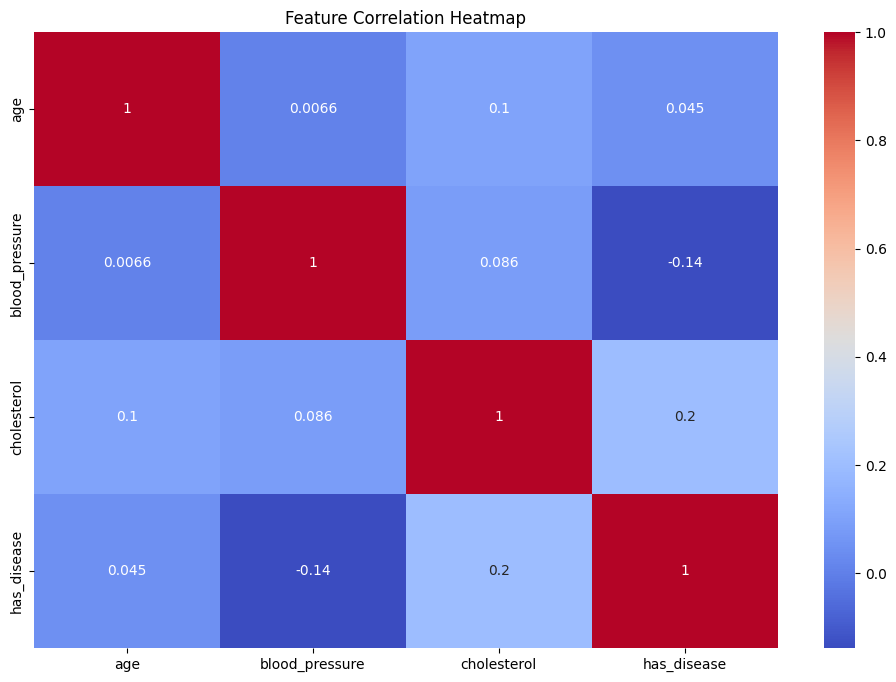

ValueError: Could not interpret value `Disease` for `x`. An entry with this name does not appear in `data`.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
sns.countplot(x='Disease', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Disease Labels')
plt.show()
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy = [0.89, 0.92, 0.87]

plt.bar(models, accuracy, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

